| |<font size="5">(KNeighborsRegressor) معالجة البيانات بشكل تسلسلي </font>|
|-:|-:|
|<img src="http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/08_CV_Ensembling/fig-kfold.png" width=350></img>||
||<font size="4"> تحميل البيانات  </font>| 
||<font size="4">  معالجة البيانات </font>| 
||<font size="4"> تصميم بنية معالجة متسلسلة </font>| 
||<font size="4">KNeighborsRegressor  تدريب البيانات </font>| 
||<font size="4"> تقويم أداء الخوارزمية </font>| 

In [ ]:
pwd

'/content'

In [ ]:
cd drive/My\ Drive/ML-Course

/content/drive/My Drive/ML-Course


In [ ]:
ls ./data/

Advertising.csv                       HousePrice3.csv
bst_features.csv                      HousePrice_4.csv
bst_target.csv                        housePrice_5.csv
california_housing_test.csv           HousePrice_5.csv
california_housing_train.csv          HousePrice.csv
data_1.csv                            kidney_disease.csv
data_cleaned.csv                      pandas_1.csv
df_merged.cvs                         pandas_2.csv
features_kept1.csv                    pandas_3.csv
features_selected.txt                 sales.csv
Google_Stock_Price_Test.textClipping  sales-funnel.xlsx
HousePrice1.csv                       wdbc.data
HousePrice2.csv                       weather.csv


In [ ]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("./data/housePrice_5.csv", index_col=0)

In [ ]:
df.head()

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,MiscVal,LotArea,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,Electrical,GarageType,SaleType,SaleCondition,SalePrice
0,5,548,2566,196.0,0,854,706,856,0,8450,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,208500
1,31,460,2524,0.0,298,0,978,1262,0,9600,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,SBrkr,Attchd,WD,Normal,181500
2,6,608,2706,162.0,0,866,486,920,0,11250,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,223500
3,36,642,2473,0.0,0,756,216,961,0,9550,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,SBrkr,Detchd,WD,Abnorml,140000
4,8,836,3343,350.0,192,1053,655,1145,0,14260,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,250000


In [ ]:

df.shape

(1460, 31)

![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [ ]:
#  طيبعة البيانات  وعدد البيانات الناقصة
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1460 non-null   int64  
 1   GarageArea     1460 non-null   int64  
 2   TotalSF        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   WoodDeckSF     1460 non-null   int64  
 5   2ndFlrSF       1460 non-null   int64  
 6   BsmtFinSF1     1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   MiscVal        1460 non-null   int64  
 9   LotArea        1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Street         1460 non-null   object 
 12  LandContour    1460 non-null   object 
 13  Utilities      1460 non-null   object 
 14  LotConfig      1460 non-null   object 
 15  Neighborhood   1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  Condition2     1460 non-null   object 
 18  BldgType

In [ ]:
df.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df.select_dtypes("number").columns

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF', '2ndFlrSF',
       'BsmtFinSF1', '1stFlrSF', 'MiscVal', 'LotArea', 'SalePrice'],
      dtype='object')

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU)

In [ ]:

#Standardize the features by removing the mean and scaling to unit variance.
import numpy as np
X=df.drop("SalePrice", axis=1)
y=np.log1p(df.SalePrice)    # test 1st as df.Saleprice  then turn to log1p
# y=df.SalePrice
X.keys()

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF', '2ndFlrSF',
       'BsmtFinSF1', '1stFlrSF', 'MiscVal', 'LotArea', 'MSZoning', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
#  لن نقوم بحذف جميع القيم الناقصة ولكن سنعالجها  (  to carry on From here)
# df.dropna(inplace=True)


In [ ]:
df.shape

(1460, 31)

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [ ]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)



## Ppeline  توظيف المعالجة المتسلسلة 
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/pr7.png)

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import  

from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline
  

num_pipeline= make_pipeline(
    SimpleImputer(strategy="most_frequent" ),# تحديد الوسيط كبديل عن كل القيم الناقصة في الجدول  " most_frequent"
    StandardScaler()    # تغيير سلم البيانات الرقمية 
)


preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية  
     remainder="drop"  # واسقاط باقي البيانات الغير رقمية 
     
     )

In [ ]:

# التحقق من تحويل  البيانات 
preprocess.fit_transform(X_train)

array([[ 1.15858999,  0.01333232, -0.71801762, ..., -0.29259108,
        -0.1246488 , -0.16826381],
       [-1.10616644, -2.27254222, -0.41623049, ..., -0.12299393,
        -0.1246488 , -0.20272184],
       [-1.05798013,  1.6991648 ,  0.78126085, ...,  1.15155436,
        -0.1246488 , -0.17796054],
       ...,
       [-0.33518553,  0.45145827, -1.03429053, ..., -0.78082531,
        -0.1246488 , -0.22263477],
       [-0.67248968, -1.24389868, -0.29792993, ..., -0.65748193,
        -0.1246488 , -0.26852108],
       [-1.00979383,  0.87053527,  0.41428769, ...,  0.99480548,
        -0.1246488 , -0.61119663]])

## Cross_validation : Ridge

![](https://static.thenounproject.com/png/2010152-200.png)

In [ ]:

from sklearn.neighbors import KNeighborsRegressor
  
pipe_KN= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    KNeighborsRegressor(n_neighbors = 4)  #  تغيير  القيمة 
)



<img src="https://i.ibb.co/RgLrPN6/KNN.jpg" width=300></img>  

In [ ]:
# https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [ ]:
 from sklearn.model_selection import cross_val_score
 scores=cross_val_score(pipe_KN, 
                      X_train, 
                      y_train, 
                      cv=10,
                      n_jobs=-1)
 f" Score  { scores}"

' Score  [0.75743553 0.64993787 0.72863727 0.71684168 0.77764824 0.76343024\n 0.81190236 0.77047752 0.79845235 0.77495754]'

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [ ]:
#معدل درجات الدقة في التنبؤ
f" Average Score  :  {scores.mean():.3} +/- {scores.std():.3}"

' Average Score  :  0.755 +/- 0.0442'

In [ ]:
pipe_KN= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    KNeighborsRegressor( )  #  تغيير  القيمة 
)


In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipe_KN, 
                      X_train, 
                      y_train, 
                      cv=10,
                      n_jobs=-1)
f" Score  { scores}"

' Score  [0.75653111 0.66320192 0.73282496 0.72408316 0.77380871 0.77370344\n 0.81959151 0.77591317 0.80702419 0.79798117]'

In [ ]:
#معدل درجات الدقة في التنبؤ
f" Average Score  :  {scores.mean():.3} +/- {scores.std():.3}"

' Average Score  :  0.762 +/- 0.0438'

In [ ]:

pipe_KN.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'kneighborsregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__pipeline', 'columntransformer__pipeline__memory', 'columntransformer__pipeline__steps', 'columntransformer__pipeline__verbose', 'columntransformer__pipeline__simpleimputer', 'columntransformer__pipeline__standardscaler', 'columntransformer__pipeline__simpleimputer__add_indicator', 'columntransformer__pipeline__simpleimputer__copy', 'columntransformer__pipeline__simpleimputer__fill_value', 'columntransformer__pipeline__simpleimputer__missing_values', 'columntransformer__pipeline__simpleimputer__strategy', 'columntransformer__pipeline__simpleimputer__verbose', 'columntransformer__pipeline__standardscaler__copy', 'columntransformer__pipeline__standardscaler__with_mean', 'columntrans

In [ ]:
from sklearn.model_selection import validation_curve

kn_neighbhors = np.arange(2, 20)
train_scores, test_scores = validation_curve(estimator=pipe_KN, 
                                              X=X_train, 
                                              y=y_train,
                                              param_name="kneighborsregressor__n_neighbors" ,
                                              param_range=kn_neighbhors, 
                                              cv=10
 )



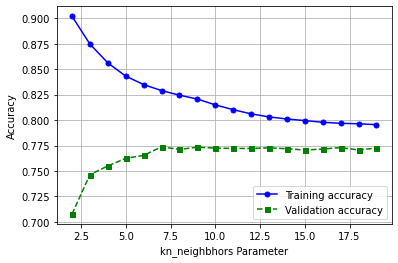

In [ ]:
import matplotlib.pyplot as plt


plt.plot(kn_neighbhors, np.mean(train_scores, axis=1)
  , color='blue', 
  marker='o',
  markersize=5, 
  label='Training accuracy')


plt.plot(kn_neighbhors, np.mean(test_scores, axis=1),
         color='green', 
         linestyle='--',
         marker='s', 
         markersize=5,
         label='Validation accuracy')


plt.grid()
# plt.xscale('log')

plt.xlabel('kn_neighbhors Parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8, 1.03])
plt.show()

In [ ]:
pipe_KN= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    KNeighborsRegressor(n_neighbors=13)  #  تغيير  القيمة 
)

In [ ]:
cross_val_score(pipe_KN, 
                      X_train, 
                      y_train, 
                      cv=10,
                      n_jobs=-1).mean()

0.7728134967132894